<a href="https://colab.research.google.com/github/mariareinaprado2000-hub/ESTADISTICA-II-2025/blob/main/Proyecto_U1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Estudiantes          15 non-null     object 
 1   Horas de suenio (X)  15 non-null     float64
 2   Calificacion (Y)     15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 492.0+ bytes


,Horas de suenio (X),Calificacion (Y)
count,15.00000,15.00000
mean,5.86000,83.88000
std,1.47154,9.01429
min,4.10000,69.00000
25%,4.70000,78.95000
50%,5.40000,83.40000
75%,7.20000,88.65000
max,8.50000,100.70000


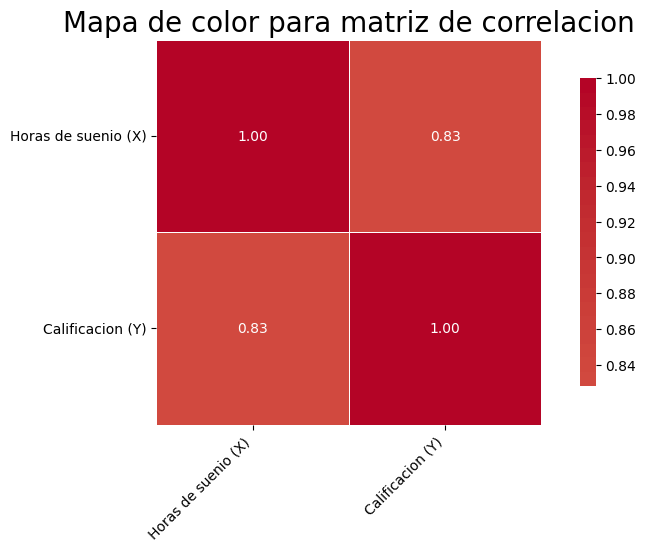

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el CSV
url = "https://raw.githubusercontent.com/mariareinaprado2000-hub/ESTADISTICA-II-2025/main/Datos_Suen%CC%83o_Rendimiento.csv"

# almacenar el dataframe
df=pd.read_csv(url)

# Calcula la matriz de correlacion, excluyendo la columna Estudiante
matriz_de_correlacion = df[['Horas de suenio (X)', 'Calificacion (Y)']].corr()

plt.figure(figsize=(10,5), dpi= 100)

sns.heatmap(
    matriz_de_correlacion, #lo que va a graficar
    annot= True, #se muestran los valores en las celdas
    fmt= "0.2f", #0.2f significa "dos decimales"
    cmap= "coolwarm", #paleta de colores
    square= True, #forzar cuadrados
    linewidths= 0.5, #grosor de lineas
    cbar_kws= {"shrink":0.8}, #tamaño barra lateral
    center= 0,
    )

plt.title("Mapa de color para matriz de correlacion", fontsize=20)
plt.xticks(rotation= 45, ha= "right")
plt.yticks(rotation= 0)

df.info()
df.describe()


Coeficiente de correlación:  0.8282

Coeficiente de determinación:  0.6859

coeficiente de determinacion: 0.6858645669656307


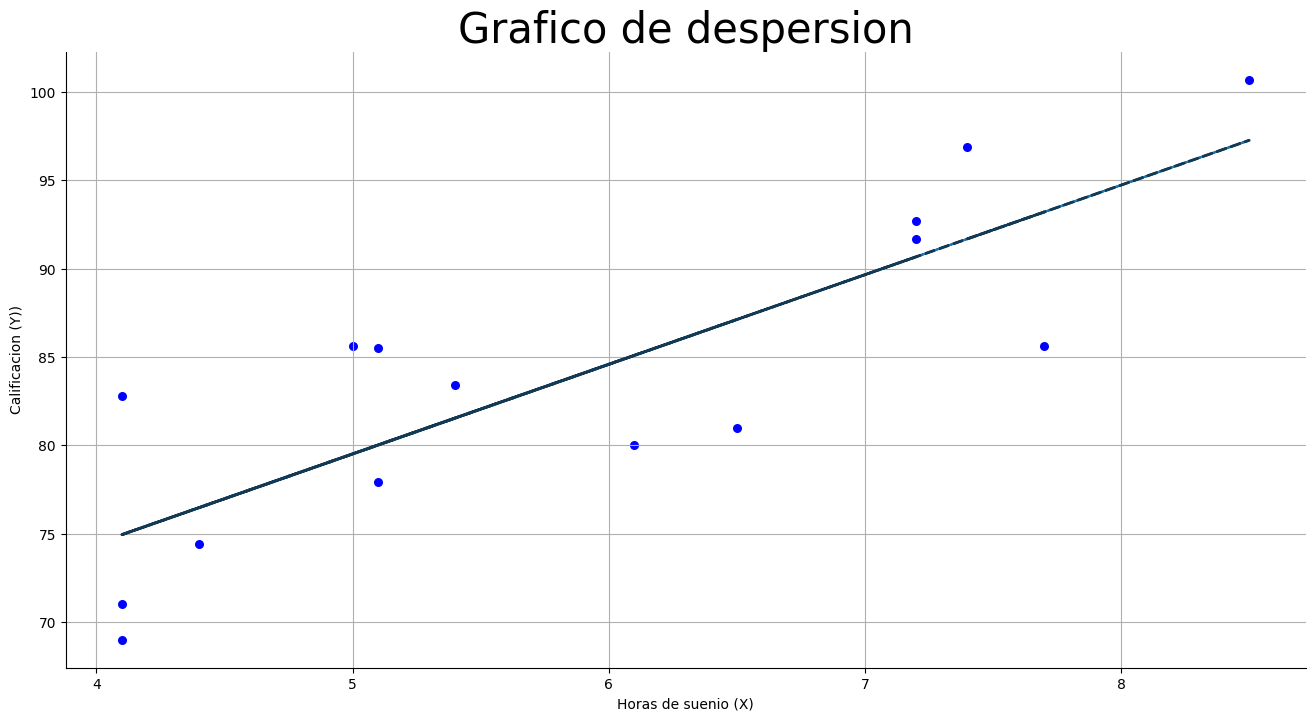


coeficiente de determinacion= 0.6859
Intervalo de confianza para b1 de  95%
 3.0160 < b1 <  7.1304

valor-p de Shapiro:  0.3725

valor_p de Breusch-Pagan:  0.6501

x=0 [54.15126666]
x=4 [74.4439174]


,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Horas de suenio (X)"")",1.0,780.242275,780.242275,28.383425,0.000137
Residual,13.0,357.361725,27.489363,NaN,NaN


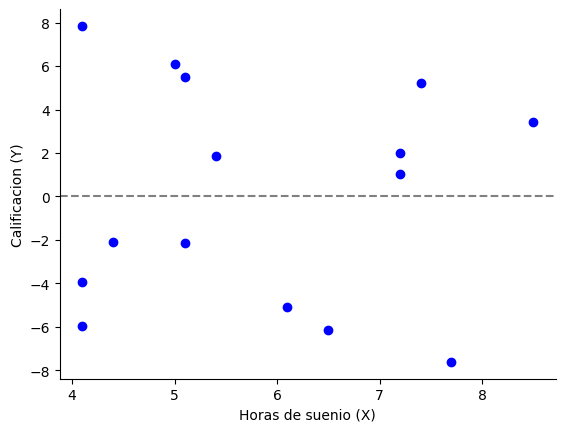

In [7]:
# 1. Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
import pandas as pd

x = df["Horas de suenio (X)"]
y = df["Calificacion (Y)"]

# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8),dpi=100)
plt.scatter(x,y,label="calificacion",color="blue",s=30)
plt.xlabel('Horas de suenio (X)') # nombrar eje x
plt.ylabel('Calificacion (Y))') # nombrar eje y
plt.title("Grafico de despersion",fontsize=30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
# plt.legend()

# 3. ¿Los datos soportan la suposición de linealidad? Si, los datos presentan una relación
#que puede considerarse aproximadamente lineal, se observa una tendencia positiva
#a medida que aumentan las horas de sueño, también tienden a mejorar
#os resultados de los estudiantes.

# 4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')
#Si hay correlación, pero de una manera moderada ya que aunque los entrenamientos semanales pueden aumentar, pero las horas de entrenamiento
#no aumentan de la misma manera proporcional.

# 5. Calcule el coeficiente de determinación e interprete el resultado.
#El coeficiente de determinación obtenido indica qué proporción de la variabilidad
#en el rendimiento de los estudiantes (Y) es explicada por las horas de sueño (X).
#el valor muestra que una parte significativa, aunque no total

from sklearn.metrics import r2_score  # recomendada
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

#6)Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico


from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion:",r2)

plt.plot(x,yc)
plt.plot(x,yc,color="black",linestyle="--",linewidth=2,alpha=0.5)

plt.show()

print("\ncoeficiente de determinacion=",round(r2,4))

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color = 'blue')
plt.xlabel('Horas de suenio (X)')
plt.ylabel('Calificacion (Y)')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Breusch-Pagan para los residuales y comente el
# resultado.
#Dado el resultado obtenido, no se rechaza la hipótesis nula de homocedasticidad
#lo que significa que la varianza de los errores puede considerarse constante.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11.
print("x=0",modelo.predict([[1,0]]))
print("x=4",modelo.predict([[1,4]]))

#12.
from statsmodels.formula.api import ols
modelo_lineal = ols('Q("Calificacion (Y)") ~ Q("Horas de suenio (X)")', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
